http://earthquake.usgs.gov/data/centennial/

In [1]:
from pandas import read_fwf

fname = 'centennial_Y2K.CAT'
names = ['icat', 'asol', 'isol', 'yr', 'mon', 'day', 'hr',
         'min', 'sec', 'glat', 'glon', 'dep', 'greg',
         'ntel', 'mag', 'msc', 'mdo']

widths = [7, 1, 4, 6, 2, 4, 3, 3, 7, 7, 9, 6, 4, 4, 4, 3, 6, 4]

df = read_fwf(fname, widths=widths, names=names, index_col=False)

df.tail()

,icat,asol,isol,yr,mon,day,hr,min,sec,glat,glon,dep,greg,ntel,mag,msc,mdo
13536,EHB,F,EQM,2007,9,28,13,38,59.61,21.96,142.70,277.5,0,463,7.5,Mw,HRV
13537,EHB,D,EQM,2007,9,29,5,37,6.54,2.91,95.51,29.3,0,155,6.0,Mw,HRV
13538,EHB,F,EQM,2007,9,30,2,8,29.85,10.46,145.71,14.0,0,302,7.0,Mw,HRV
13539,EHB,F,EQM,2007,9,30,5,23,34.05,-49.29,164.09,10.0,0,335,7.4,Mw,HRV
13540,EHB,F,EQM,2007,9,30,9,47,51.52,-49.20,163.69,18.0,0,344,6.6,Mw,HRV


In [2]:
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


def make_map(projection=ccrs.PlateCarree(central_longitude=180), figsize=(11, 5.75)):
    subplot_kw = dict(projection=projection)
    fig, ax = plt.subplots(subplot_kw=subplot_kw, figsize=figsize)
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlocator = mticker.FixedLocator([-60, -120, -180, 120, 60, 0])
    ax.stock_img()
    ax.set_global()
    ax.coastlines()
    return fig, ax

/usr/lib64/python3.4/site-packages/matplotlib/artist.py:196: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


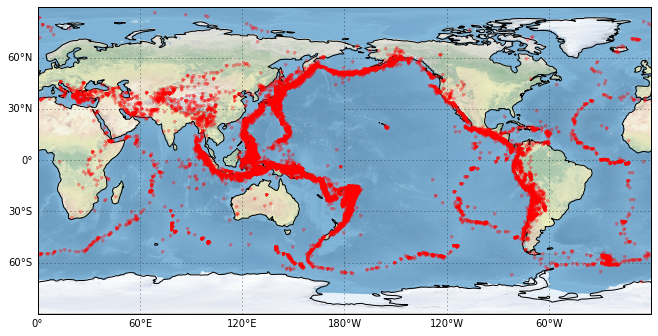

In [3]:
fig, ax = make_map()

ax.plot(df['glon'], df['glat'], 'r.', alpha=0.35, transform=ccrs.Geodetic())
fig.savefig('global_seismicity.png')

http://www.ngdc.noaa.gov/nndc/servlet/ShowDatasets?dataset=102557&search_look=50&display_look=50

In [4]:
from pandas import read_csv

df = read_csv('volerup.txt', sep='\t', index_col='Year')

df.head()

,Month,Day,TSU,EQ,Name,Location,Country,Latitude,Longitude,Elevation,...,TOTAL_DEATHS,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION
Year,,,,,,,,,,,,,,,,,,,,,
-4360,NaN,NaN,NaN,NaN,Macauley Island,Kermadec Is,New Zealand,-30.200,-178.470,238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-4350,NaN,NaN,NaN,NaN,Kikai,Ryukyu Is,Japan,30.780,130.280,717,...,NaN,3,NaN,NaN,NaN,NaN,NaN,3,NaN,3
-4050,NaN,NaN,NaN,NaN,Masaya,Nicaragua,Nicaragua,11.984,-86.161,635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-4000,NaN,NaN,NaN,NaN,Pago,New Britain-SW Pac,Papua New Guinea,-5.580,150.520,742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3580,NaN,NaN,NaN,NaN,Taal,Luzon-Philippines,Philippines,14.002,120.993,400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


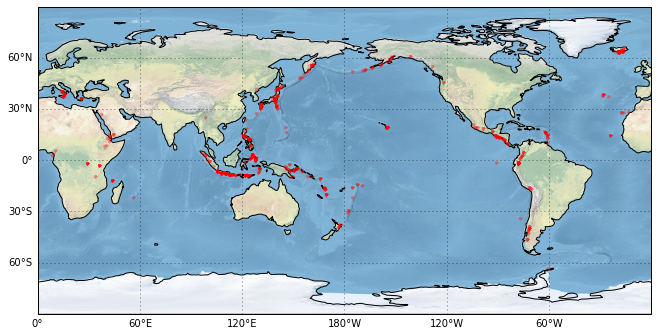

In [5]:
fig, ax = make_map()

ax.plot(df['Longitude'], df['Latitude'], 'r.', alpha=0.35, transform=ccrs.Geodetic())
fig.savefig('volerup.png')

http://www.wovodat.org/

http://earthquake.usgs.gov/earthquakes/world/historical_country_mag.php

http://earthquaketrack.com/